In [5]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import networkx as nx
from networkx.algorithms.approximation import average_clustering
import community.community_louvain as cl

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
import seaborn as sns

from sklearn.metrics import adjusted_rand_score

# Funciones de utiles.py
# from utiles import read_graph , read_graph_weighted, get_graph_pos , drop_weights , plotGraph , plotWeightedGraph
from utiles import *

In [2]:
email = read_graph('datasets/email.txt')
terr= read_graph_weighted('datasets/terrorist.txt')
TerroristUnweighted = terr.copy()
drop_weights(TerroristUnweighted)

In [3]:
Gemail=email.copy()
Gemail.remove_edges_from(nx.selfloop_edges(Gemail)) # Borro autoenlaces
Gemailcc = sorted(nx.connected_components(Gemail), key=len, reverse=True)
emailGiant = Gemail.subgraph(Gemailcc[0])

In [4]:
pos_terr = nx.spring_layout(terr,iterations=1000)
pos_email = nx.spring_layout(email,iterations=1000)
pos_emailGiant = nx.spring_layout(emailGiant,iterations=1000)

# CENTRALIDAD Intermediacion vs CENTRALIDAD de Grado

In [6]:
email_centr_betweenness = nx.betweenness_centrality(emailGiant)
email_centr_grado = nx.degree_centrality(emailGiant)

terr_centr_betweenness = nx.betweenness_centrality(terr)
terr_centr_grado = nx.degree_centrality(terr) 

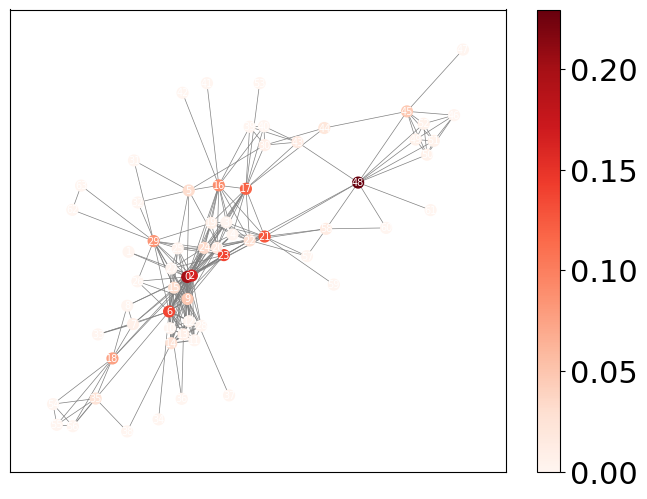

In [6]:
plotWeightedGraph(terr , pos_terr , terr_centr_betweenness, 1,60)

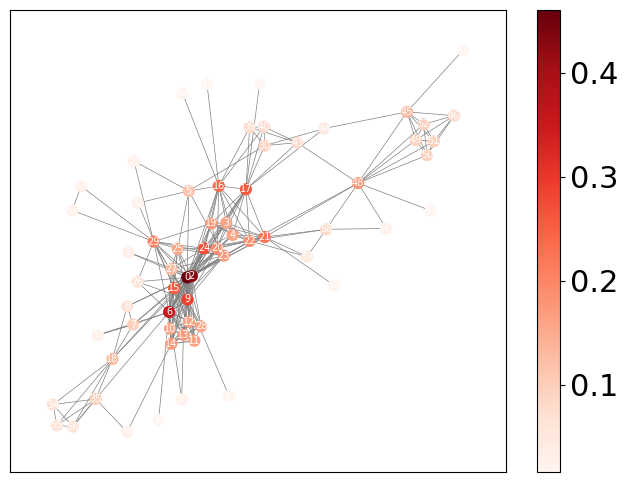

In [7]:
plotWeightedGraph(terr , pos_terr , terr_centr_grado, 1 , 60)


In [ ]:
max(email_centr_betweenness.values())

0.09082135184037173

In [11]:
max(email_centr_grado.values())

0.350253807106599

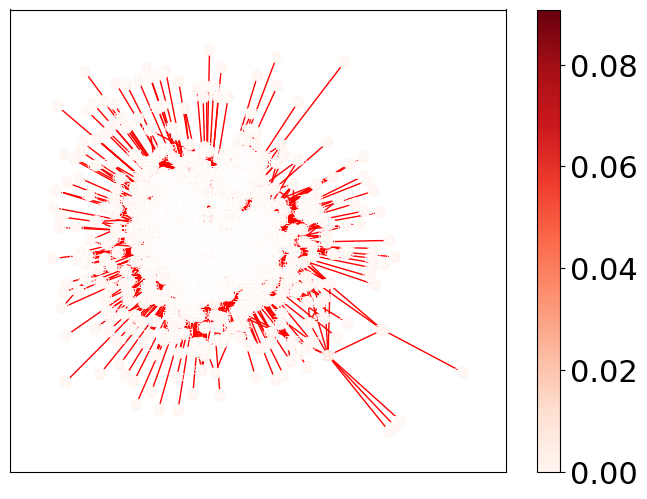

In [9]:
plotGraph(emailGiant , pos_emailGiant , email_centr_betweenness ,60)

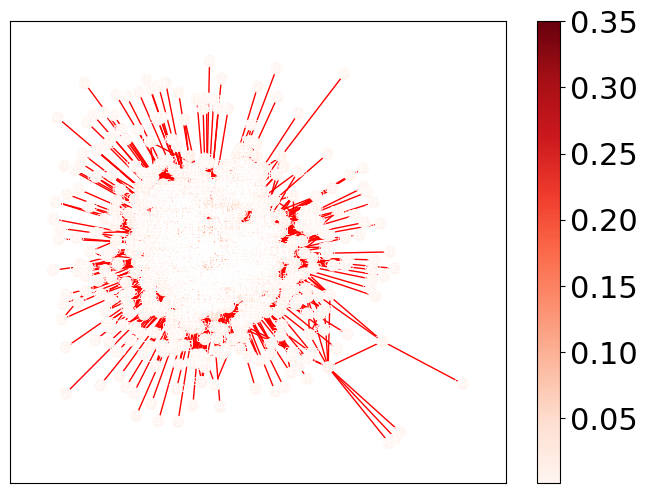

In [10]:
plotGraph(emailGiant , pos_emailGiant , email_centr_grado ,60)